In [ ]:
# Import required libraries
from google.colab import files
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Reshape, BatchNormalization, LeakyReLU, Conv2DTranspose, Conv2D, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Step 1: Upload and preprocess images
# Create a folder to save uploaded images
if not os.path.exists('food_images'):
    os.makedirs('food_images')

# Upload images
uploaded = files.upload()
for file_name in uploaded.keys():
    with open(os.path.join('food_images', file_name), 'wb') as f:
        f.write(uploaded[file_name])

# Parameters
image_size = (128, 128)
latent_dim = 100  # Dimension of noise vector
images = []

# Load and preprocess images
for img_file in os.listdir('food_images'):
    try:
        img = Image.open(os.path.join('food_images', img_file)).resize(image_size)
        img_array = np.array(img) / 127.5 - 1.0  # Normalize to [-1, 1]
        if img_array.shape == (128, 128, 3):  # Ensure images are RGB
            images.append(img_array)
    except Exception as e:
        print(f"Skipping {img_file}: {e}")

# Convert to NumPy array
images = np.array(images)
print(f"Loaded {images.shape[0]} images.")

Saving __9iwbCjGn-8vrarsK-xzQ.jpg to __9iwbCjGn-8vrarsK-xzQ.jpg
Saving -__DdEVsZPQkwqHgAoZOOg.jpg to -__DdEVsZPQkwqHgAoZOOg.jpg
Saving __T1NBPalX5HX0rvRblpIQ.jpg to __T1NBPalX5HX0rvRblpIQ.jpg
Saving _2RtWGLPJAr4cFRNi2mH-g.jpg to _2RtWGLPJAr4cFRNi2mH-g.jpg
Saving _2sAokPoIAtvzqrxat7BMw.jpg to _2sAokPoIAtvzqrxat7BMw.jpg
Saving _3a9eOI_TZZ5y7kFxeFi_g.jpg to _3a9eOI_TZZ5y7kFxeFi_g.jpg
Saving _3aajVHXDEtnETvBGqrS4Q.jpg to _3aajVHXDEtnETvBGqrS4Q.jpg
Saving _3aIxQksBamCDCmFJzq5bA.jpg to _3aIxQksBamCDCmFJzq5bA.jpg
Saving _3BqFAjURzFrM9g3Zow-wQ.jpg to _3BqFAjURzFrM9g3Zow-wQ.jpg
Saving _5rRTq8Kw1shYfQXCrnP8w.jpg to _5rRTq8Kw1shYfQXCrnP8w.jpg
Saving _5YQNyr1XbpK1FgyFCiaPg.jpg to _5YQNyr1XbpK1FgyFCiaPg.jpg
Saving _6FUZ-e1BqlRtEfr6iUn-Q.jpg to _6FUZ-e1BqlRtEfr6iUn-Q.jpg
Saving _6La1HkWXnp9XQyJ-bH49g.jpg to _6La1HkWXnp9XQyJ-bH49g.jpg
Saving _7e3OFV0YAQWuqhB0JxQow.jpg to _7e3OFV0YAQWuqhB0JxQow.jpg
Saving _7F_Ru3R65I6xg1fvAaQ4A.jpg to _7F_Ru3R65I6xg1fvAaQ4A.jpg
Saving _-7FrniblpYdE7n9oQoHMA.jpg to _-7

In [ ]:
# Step 2: Build the Generator
def build_generator():
    noise_input = Input(shape=(latent_dim,))  # Input: Noise vector
    x = Dense(8 * 8 * 256)(noise_input)  # Dense layer
    x = LeakyReLU(alpha=0.2)(x)
    x = Reshape((8, 8, 256))(x)  # Reshape to (8, 8, 256)

    # Upsampling to (16, 16, 128)
    x = Conv2DTranspose(128, kernel_size=4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    # Upsampling to (32, 32, 64)
    x = Conv2DTranspose(64, kernel_size=4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    # Upsampling to (64, 64, 32)
    x = Conv2DTranspose(32, kernel_size=4, strides=2, padding='same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.2)(x)

    # Final Upsampling to (128, 128, 3)
    x = Conv2DTranspose(3, kernel_size=4, strides=2, padding='same', activation='tanh')(x)

    return Model(noise_input, x, name="Generator")

generator = build_generator()
generator.summary()


Model: "Generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16384)               │       1,654,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_1 (Reshape)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 16, 16, 128)         │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 32, 32, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_6 (Conv2DTranspose) │ (None, 64, 64, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_7 (Conv2DTranspose) │ (None, 128, 128, 3)         │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,345,571 (8.95 MB)

 Trainable params: 2,345,123 (8.95 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Step 3: Build the Discriminator
def build_discriminator():
    img_input = Input(shape=(128, 128, 3))
    x = Conv2D(64, kernel_size=4, strides=2, padding='same')(img_input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.4)(x)

    x = Conv2D(128, kernel_size=4, strides=2, padding='same')(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dropout(0.4)(x)

    x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    return Model(img_input, x, name='Discriminator')

discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
discriminator.summary()

Model: "Discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │         131,073 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 265,409 (1.01 MB)

 Trainable params: 265,409 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Build and Compile the cGAN
discriminator.trainable = False  # Freeze discriminator
noise_input = Input(shape=(latent_dim,))
generated_img = generator(noise_input)
validity = discriminator(generated_img)

cgan = Model(noise_input, validity)
cgan.compile(optimizer='adam', loss='binary_crossentropy')
cgan.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Generator (Functional)               │ (None, 128, 128, 3)         │       2,345,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Discriminator (Functional)           │ (None, 1)                   │         265,409 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,610,980 (9.96 MB)

 Trainable params: 2,345,123 (8.95 MB)

 Non-trainable params: 265,857 (1.01 MB)

In [ ]:
# Step 5: Train the cGAN
# Training Parameters
epochs = 500
batch_size = 64

# Real and Fake Labels
real = np.ones((batch_size, 1)) * 0.9  # Label smoothing
fake = np.zeros((batch_size, 1))

# Training loop
# Training loop
for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, images.shape[0], batch_size)
    real_imgs = images[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(real_imgs, real)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = cgan.train_on_batch(noise, real)

    # Print progress every 100 epochs
    if epoch % 100 == 0:
        # Access the loss value (first element) from d_loss and g_loss, which are lists.
        print(f"{epoch} [D loss: {d_loss[0]:.4f}] [G loss: {g_loss[0]:.4f}]")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
0 [D loss: 0.7361] [G loss: 0.7216]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step


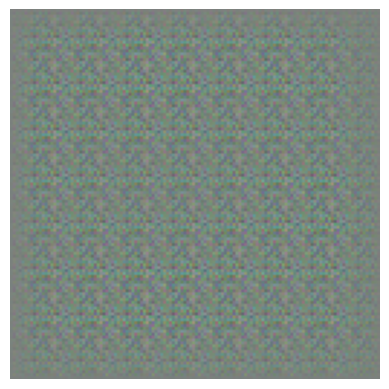

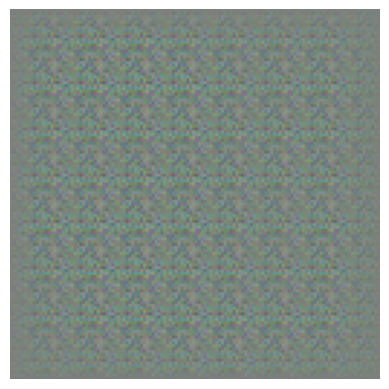

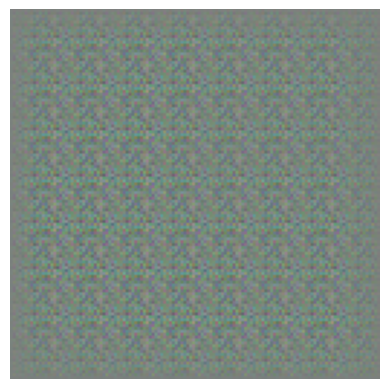

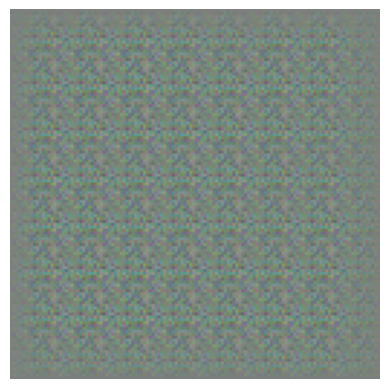

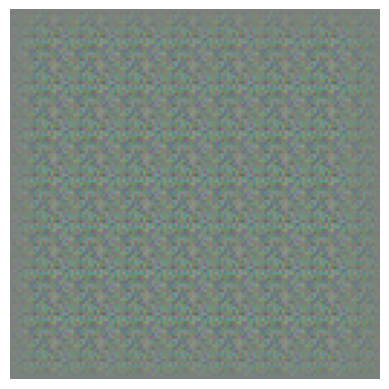

In [ ]:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++# Step 6: Generate and Save Images
# Step 6: Generate and Save Images
noise = np.random.normal(0, 1, (5, latent_dim))
gen_imgs = generator.predict(noise)
gen_imgs = (gen_imgs + 1) * 127.5  # Rescale to [0, 255]

for i, img in enumerate(gen_imgs):
    plt.imshow(img.astype('uint8'))
    plt.axis('off')
    plt.savefig(f"generated_image_{i}.png")
    plt.show()